# EDA 

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import datetime
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import spacy
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud

## Carga del set de datos
El primer paso es cargar el set de datos e identificar las variables, tipos de dato y distribución

In [2]:
df_bronz = pd.read_csv('../data/bronze/EVERTEC_DS.csv')
df_bronz.head()

,ID_TRX,S_PAN,S_ENCRYPTED_PAN,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,S_MERCHANT_LEGAL_NAME,FRAUDE
0,508924809,488245******4567,1000065275814567,5.4,840,5.388,20201001190732,7372,840,10,59,GOOGLE *GSUITE_inversi,0
1,509028097,410443******1014,1000126292771014,3350.0,188,5.570,20201001194719,4121,372,102,59,UBR* PENDING.UBER.COM,0
2,511351088,434527******5015,1000007433745015,10.8,840,10.800,20201002095534,4816,840,10,59,Google LLC GSUITE_iyta,0
3,515833505,410443******0018,1000126530570018,4960.8,188,8.280,20201004101419,4814,188,10,59,RAPPI,0
4,519145453,478787******2328,1000020382542328,40250.0,188,67.177,20201005173241,5661,188,10,59,FLEXI SHOES,0


In [3]:
df_bronz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29240 entries, 0 to 29239
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_TRX                          29240 non-null  int64  
 1   S_PAN                           29240 non-null  object 
 2   S_ENCRYPTED_PAN                 29240 non-null  int64  
 3   F_AMOUNT_TRANSACTION            29240 non-null  float64
 4   N_CURRENCY_CODE_TRANSACTION     29240 non-null  int64  
 5   F_DOLLAR_AMOUNT                 29240 non-null  float64
 6   N_TRANSMISSION_DATE_AND_TIME    29240 non-null  int64  
 7   N_MERCHANT_TYPE                 29240 non-null  int64  
 8   N_ACQ_INSTITUTION_COUNTRY_CODE  29240 non-null  int64  
 9   N_ENTRY_MODE                    29240 non-null  int64  
 10  N_POINT_OF_SERV_COND_CODE       29240 non-null  int64  
 11  S_MERCHANT_LEGAL_NAME           29240 non-null  object 
 12  FRAUDE                          

In [4]:
df_bronz.drop(columns=['ID_TRX','S_ENCRYPTED_PAN']).describe()

,F_AMOUNT_TRANSACTION,N_CURRENCY_CODE_TRANSACTION,F_DOLLAR_AMOUNT,N_TRANSMISSION_DATE_AND_TIME,N_MERCHANT_TYPE,N_ACQ_INSTITUTION_COUNTRY_CODE,N_ENTRY_MODE,N_POINT_OF_SERV_COND_CODE,FRAUDE
count,2.924000e+04,29240.000000,29240.000000,2.924000e+04,29240.000000,29240.000000,29240.000000,29240.000000,29240.000000
mean,1.722787e+04,501.958003,48.387343,2.020862e+13,5656.369596,611.355951,46.973324,58.521956,0.200000
std,1.364287e+06,306.693717,272.210613,3.885395e+09,1137.460941,232.638922,44.358989,5.243944,0.400007
min,-7.000000e+04,32.000000,0.007000,2.020100e+13,1771.000000,32.000000,10.000000,1.000000,0.000000
25%,1.099000e+01,188.000000,2.840000,2.021012e+13,4814.000000,372.000000,10.000000,59.000000,0.000000
50%,1.263400e+02,340.000000,7.053500,2.021051e+13,5814.000000,702.000000,10.000000,59.000000,0.000000
75%,2.300000e+03,840.000000,20.960000,2.021082e+13,5818.000000,840.000000,100.000000,59.000000,0.000000
max,2.077964e+08,986.000000,11678.000000,2.021113e+13,9406.000000,862.000000,102.000000,59.000000,1.000000


El metodo **describe()** permite generar un analisis estadistico descriptivo basico para las variables numericas. Se ha eliminado el ID y numeros de tarjeta para el analisis. 
* Es posible notar un desvalance claro en la variable Fraude
* No hay vacios en los datos

## Perfil de los datos
A continuación se utiliza la libreria Profile Report que de manera rapida realiza un analisis descriptivo, univariado y bivariado. Se busca obtener un mejor entendimiento del set de datos, valores unicos, distribución y posibles relaciones entre las variables

In [5]:
profile = ProfileReport(df_bronz.drop(columns=['ID_TRX','S_PAN']), title="Property Profiling Report")
#profile.to_file("../data/silver/fraud_report.html")

Es posible consultar el reporte completo en el folder [../data/silver/plots/fraud_report.html](..data/silver/plots/fraud_report.html) de este proyecto.
_La siguiente imagen presenta un fragmento del informe generado:_

> 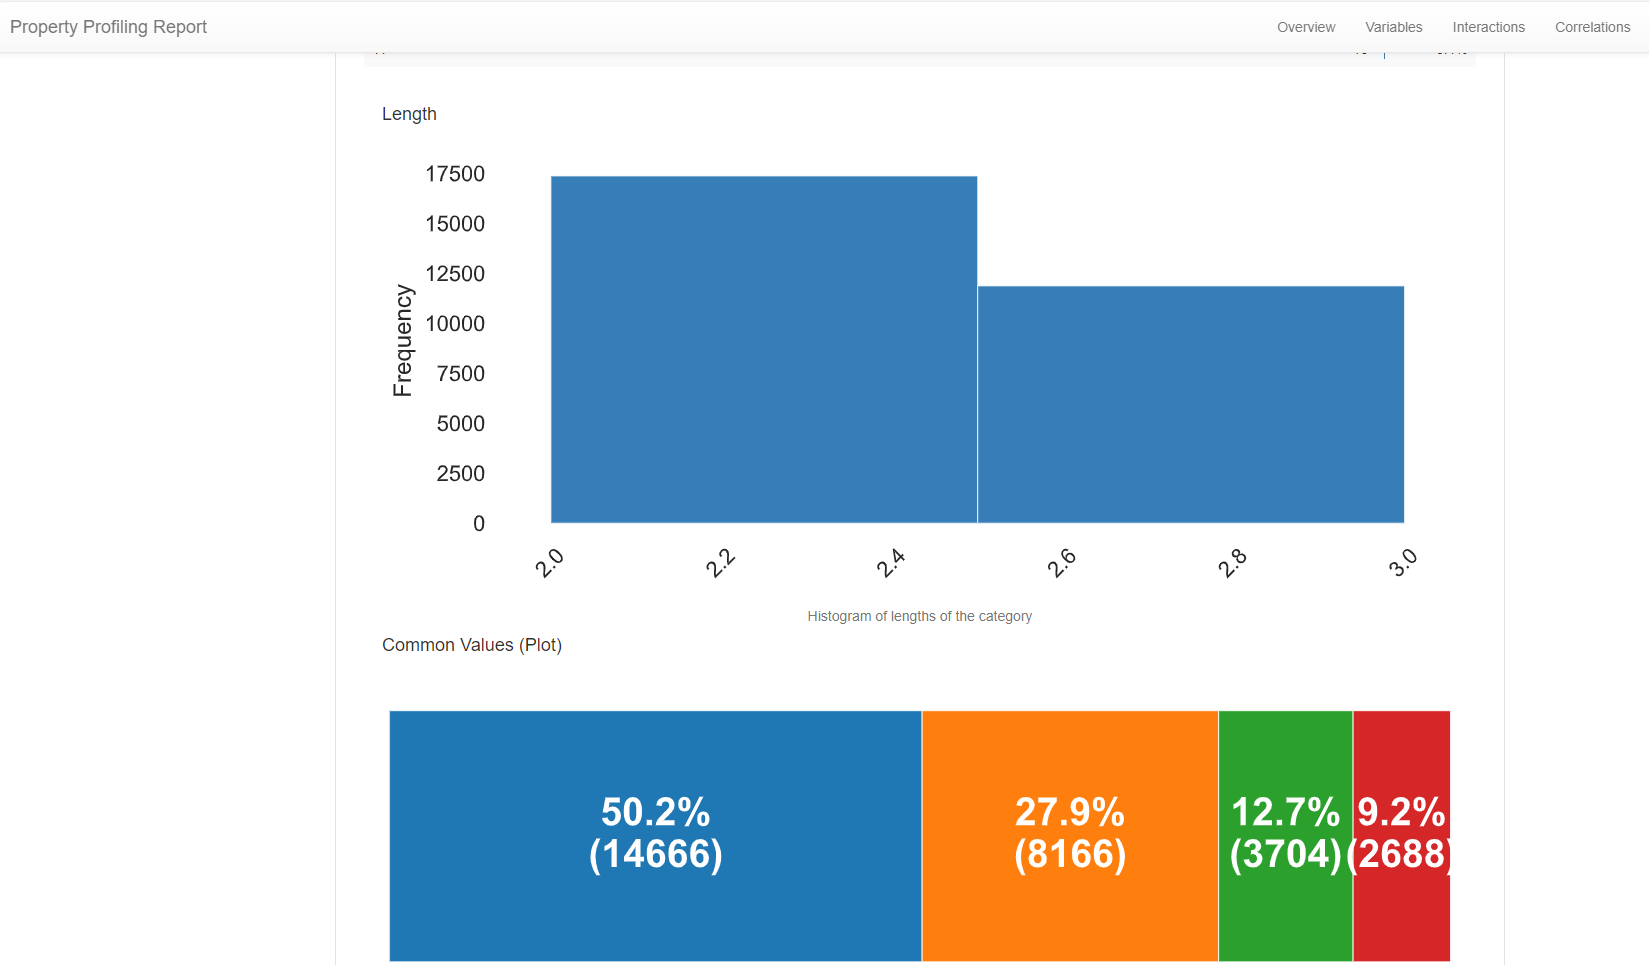

Las conclusiones se presentan a continuación:

**F_AMOUNT_TRANSACTION**¨
* **Altamente correlacionado con N_CURRENCY_CODE_TRANSACTION**
* Valores extremos negativos (0.3%) 
> _Recomendación:_ Analizar y evaluar remover valores extremos

**SPAN**
* Aunque esta variable corresponde a un indicador unico los primeros numeros que hacen referencia a la franquicia podrian servir * para verificar tendencias de fraude por franquicia 
* https://www.bbva.com/es/significan-los-numeros-las-tarjetas-credito-debito/
> _Recomendación:_ preprocesar y comparar relacion entre los casos de fraude

**N_CURRENCY_CODE_TRANSACTION**
* **Alta correlacion con F_AMOUNT_TRANSACTION**
* 95% de los valores se concentran en 3 categorias 
> _Recomendación:_ eliminar otras categorias (reemplazar con codigo 'otros')

**F_DOLLAR_AMOUNT**
* La mayoria de transacciones son de bajo monto  (sesgado) menos d 160 USD
> _Recomendación:_ Puede ser necesario remover valores extremos, verificar cantidad vs fraude

**N_TRANSMISSION_DATE_AND_TIME**
Hora, meses o dias de la semana podrian estar correlacionados con probabilidad de fraude?
> _Recomendación:_ Aplicar ingenieria de variables y verificar

**N_ACQ_INSTITUTION_COUNTRY_CODE**
* Alta correlacion con N_CURRENCY_CODE_TRANSACTION
> _Recomendación:_ Remover

**N_POINT_OF_SERV_COND_CODE**
99% de los datos en una sola categoria
> _Recomendación:_ Remover

**S_MERCHANT_LEGAL_NAME**
¿Podrian algunas empresas estar correlacionadas con fraude?
> _Recomendación:_ Aplicar procesamiento de texto y revisar relacion con fraude

## Preprocesamiento de datos y creación de caracteristicas
Con base en los hallazgos y recomendaciones previamente definidas se ejecuta a continuación un proceso de seleccion y tratamiento de variables

In [6]:
#eliminar variables altamente correlacionadas, ids unicos
df_silv = df_bronz.drop(columns=['N_ACQ_INSTITUTION_COUNTRY_CODE','ID_TRX','S_ENCRYPTED_PAN','N_POINT_OF_SERV_COND_CODE'])

A continuación se realizan algunas transformaciones con el fin de generar nuevas caracteristicas 

**S_PAN - Nueva caracteristica:** Obtener los primeros 6 numeros para ser utilizados como indicador de la franquicia o tipo de la tarjeta

In [7]:
df_silv['CARD_INF'] = df_silv['S_PAN'].str[:4].astype(int)

**N_CURRENCY_CODE_TRANSACTION** Se eliminan el resto de categorias diferentes a las 3 dominantes con mas del 95%. Se preservan: [840,188,340], los demas valores se reemplazan por 100

In [8]:
def replace_code_trans(code):
    if code in [840,188,340]:
        return code
    else:
        return 100

df_silv['N_CURRENCY_CODE_TRANSACTION'] = df_silv['N_CURRENCY_CODE_TRANSACTION'].apply(replace_code_trans)

**N_TRANSMISSION_DATE_AND_TIME** obtener dia de la semana, mes, hora 

In [9]:
df_silv['CRUD_DATE'] = df_silv['N_TRANSMISSION_DATE_AND_TIME'].astype(str).str[:10]
df_silv['MONTH_TRANSC'] = df_silv['CRUD_DATE'].str[4:6].astype(int)
df_silv['HOUR_TRANSC'] = df_silv['CRUD_DATE'].str[-2:].astype(int)

La siguiente funcion permite obtener el dia de la semana

In [10]:
def day_of_week(str_date):
    year_int = int(str_date[:4])
    month_int = int(str_date[4:6])
    day_int = int(str_date[6:8])
    date_format = datetime.date(year_int,month_int,day_int)
    return date_format.weekday()

df_silv['WEEKDAY_TRANSC'] = df_silv['CRUD_DATE'].apply(day_of_week)
#df_silv = df_silv.drop(columns=['CRUD_DATE','N_TRANSMISSION_DATE_AND_TIME'])

la variable S_MERCHANT_LEGAL_NAME puede contener información relevante sobre la empresa. Algunas plataformas pueden experimentar mas pagos fraudulentos que otras.

**NOTA IMPORTANTE** El siguiente codigo ha sido probado y descartado debido a la baja efectividad para identificar entidades de tipo empresa, por tal se descarta la variable S_MERCHANT_LEGAL_NAME

In [11]:
# def ent(text_in):
#     doc = nlp(text_in.lower())
#     for x in (nlp(doc)).ents:
#         if x.label_ != "ORG": 
#             continue
#         else:
#             return (x.text)
# df_silv['ORG'] = df_silv['S_MERCHANT_LEGAL_NAME'].apply(ent)

In [12]:
df_silv = df_silv.drop(columns=['S_PAN','CRUD_DATE','N_TRANSMISSION_DATE_AND_TIME','S_MERCHANT_LEGAL_NAME'])

### Obtener dummies para variables categoricas
El siguiente paso sera obtener valores dummie para las siguiente variables categoricas
* N_CURRENCY_CODE_TRANSACTION
* N_ENTRY_MODE

Algunas variables categoricas no pasaran por este tratamiento debido a su cantidad de valores unicos:
* N_MERCHANT_TYPE

In [13]:
df_dummies = pd.get_dummies(df_silv[['N_CURRENCY_CODE_TRANSACTION','N_ENTRY_MODE']].astype(str))
df_silv_dummy = df_silv.join(df_dummies)

### Correlación con nuevas caracteristicas

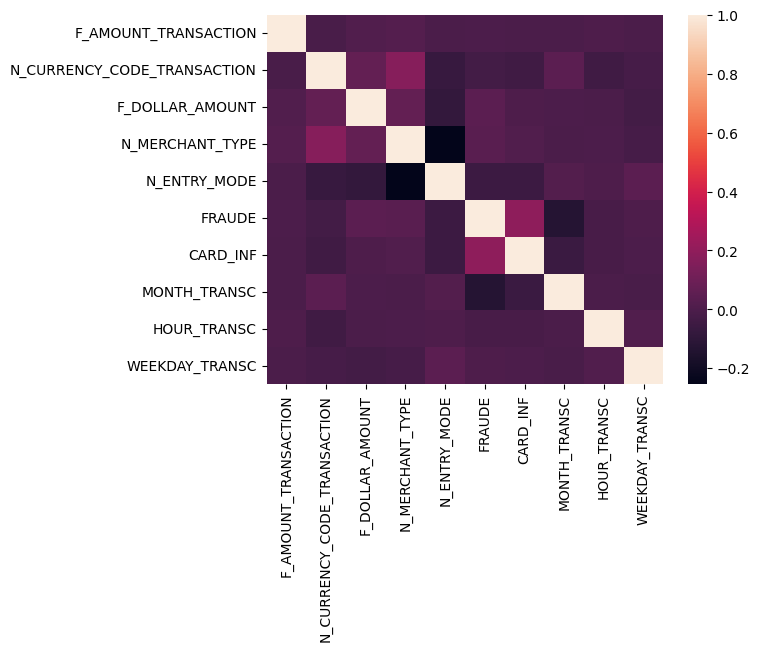

In [14]:
sns.heatmap(df_silv.corr());

El grafico anterior permite identificar que la variable creada CARD_INF tiene una correlacion del 20% con la variable fraude. Es la mas alta seguida de otra variable creada: MONTH_TRANSC con 17%

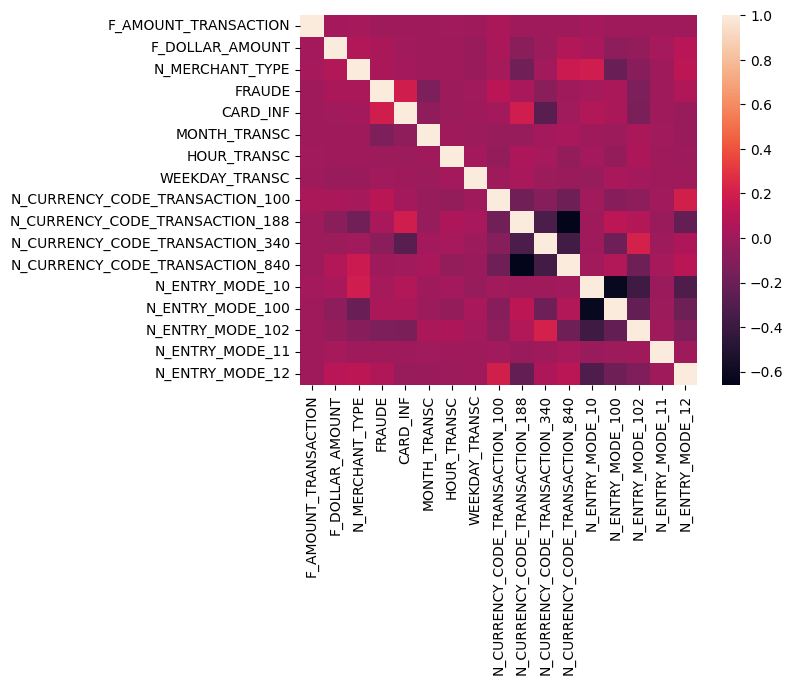

In [18]:
sns.heatmap(df_silv_dummy.drop(columns=['N_CURRENCY_CODE_TRANSACTION','N_ENTRY_MODE']).corr());

Al analizar la correlacion con las variables dummie no encontramos nuevos datos excepto las relaciones entre algunos codigos 'N_CURRENCY_CODE_TRANSACTION' y'N_ENTRY_MODE'

Se guarda el set de datos preprocesado para continuar con el analisis de datos

In [20]:
df_silv.to_parquet('../data/silver/evertec_ds.parquet')